# EA Assignment 02 - Data Preprocessing
__Authored by: Álvaro Bartolomé del Canto (alvarobartt @ GitHub)__

---

<img src="https://media-exp1.licdn.com/dms/image/C561BAQFjp6F5hjzDhg/company-background_10000/0?e=2159024400&v=beta&t=OfpXJFCHCqdhcTu7Ud-lediwihm0cANad1Kc_8JcMpA">

__Warning__: this Jupyter Notebook is a followup of the one available in `research/02 - Data Preprocessing` so on this just contains some extra features that have already been implemented in the previous Notebook, so on, the complete Data Preprocessing Notebook is the previous one.

## Loading Initial Preprocessed Data

In [1]:
import json

data = list()

with open('PreProcessedDocuments.jsonl', 'r') as f:
    for line in f.readlines():
        data.append(json.loads(line))

In [2]:
import pandas as pd

data = pd.DataFrame(data)
data.head()

,lang,context,preprocessed_text
0,en,wikipedia,watchmen twelve issue comic book limited serie...
1,en,wikipedia,citigroup center formerly citicorp center one ...
2,en,wikipedia,birth_place death_date death_place party conse...
3,en,wikipedia,marbod maroboduus born died king marcomanni no...
4,en,wikipedia,sylvester medal bronze medal awarded every thr...


---

## Finding Additional Stopwords using TF-IDF

Since we are handling documents from different contexts and different languages, we need to identify the stopwords for each unique pair of them so as to apply a TF-IDF Vectorizer so as to get the top terms and manually identify which of them are stopwords so as to include them into the Stopword Removal process of the `CustomPreProcessor`.

We start calculating all the possible combinations of context and language, so as to get to know how many TF-IDF Vectorizers we need to fit, since we will be using the tagged samples so as to detect stopwords for each context, trying not to drop words relevant in one context but irrelevant in another.

In [3]:
combinations = data[['lang', 'context']].drop_duplicates()
combinations

,lang,context
0,en,wikipedia
4000,es,wikipedia
8000,fr,wikipedia
13588,en,conference_papers
13951,fr,conference_papers
14193,en,apr
17733,fr,apr
20100,en,pan11
21847,es,pan11


Once we calculate all the possible unique context-lang combinations, we can proceed to apply the `sklearn.feature_extraction.text.TfidfVectorizer` over each slice of data using the preprocessed texts so as to later plot them as a bar plot with the words frequencies. For plotting we will be using both Python libraries: `matplotlib` and `seaborn`, as already mentioned in other Jupyter Notebooks.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')

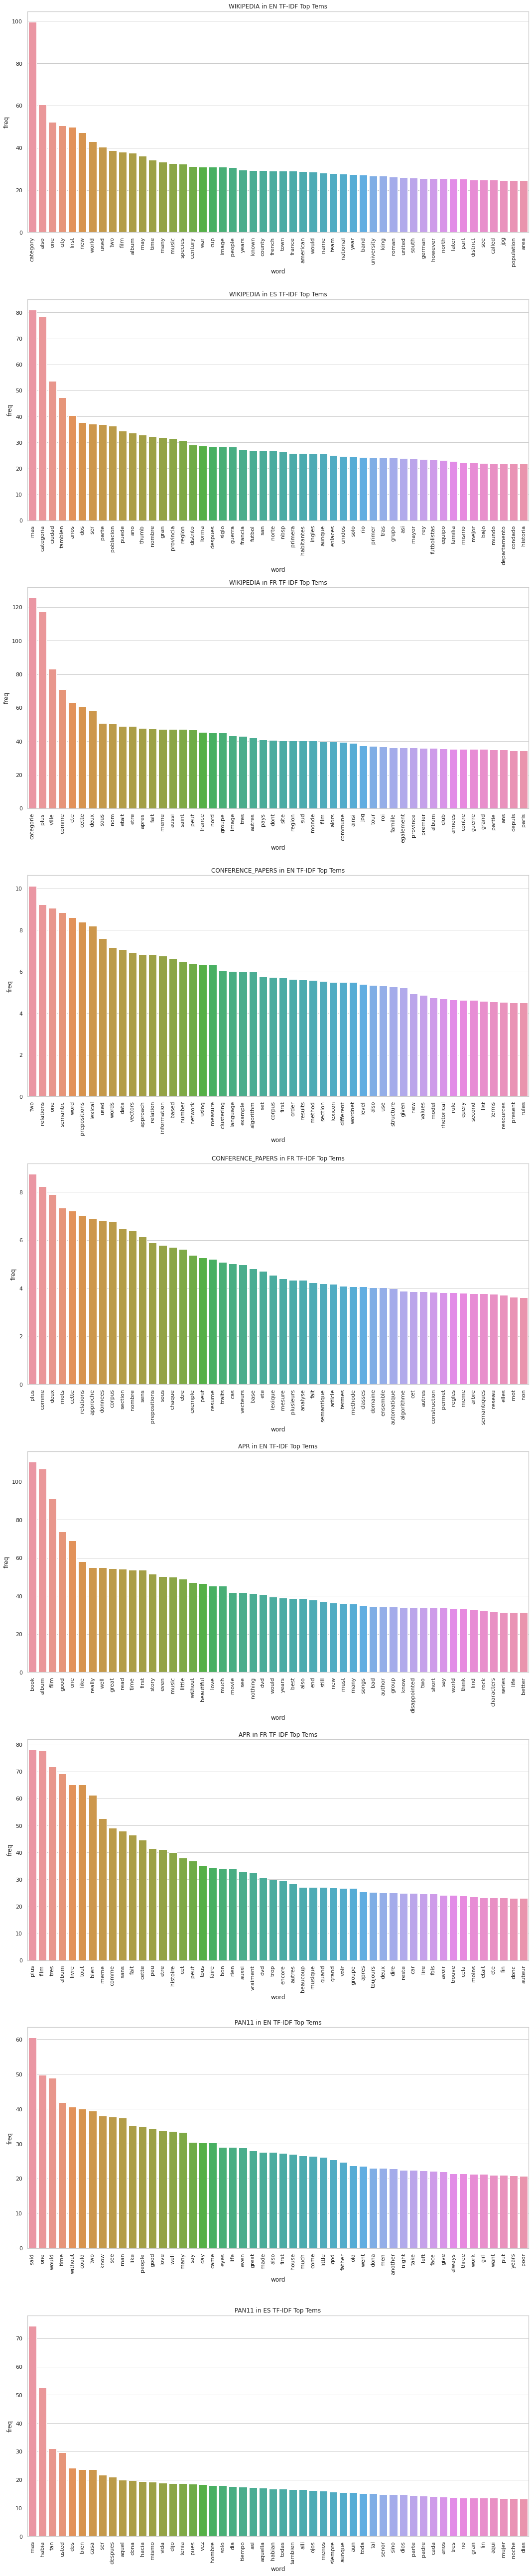

In [6]:
fig = plt.figure(figsize=(15,8*len(combinations)));

total_top_words = list()

for idx, (index, row) in enumerate(combinations.iterrows()):
    texts = data[(data['lang'] == row['lang']) & (data['context'] == row['context'])]['preprocessed_text']
    
    vect = TfidfVectorizer(min_df=5)
    sparse_mat = vect.fit_transform(texts)
    
    aux = pd.DataFrame(sparse_mat.sum(axis=0).T, columns=['freq'])
    aux['word'] = vect.get_feature_names()
    aux = aux.sort_values(by='freq', ascending=False)
    
    total_top_words += aux[:50]['word'].tolist()
    
    plt.subplot(len(combinations), 1, idx+1);
    plt.title(f"{row['context'].upper()} in {row['lang'].upper()} TF-IDF Top Tems");
    chart = sns.barplot(x='word', y='freq', data=aux[:50]);
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

fig.tight_layout();

In [7]:
from collections import Counter

total_top_words = Counter(total_top_words)
total_top_words = {key: value for key, value in total_top_words.items() if value > 1}

So on, once we plotted all the top TF-IDF terms for every possible context-lang combination, we will just manually select which of those words are considered stopwords, so as to generate a listing which will be included in the `research/02 - Data Preprocessing.ipynb` Jupyter Notebook, into the `CustomPreProcessor` defined. 

In [8]:
ADDITIONAL_STOPWORDS = [
    'category', 'also', 'one', 'new', 'first', 'two', # Wikipedia English
    'mas', 'categoria', 'tambien', 'thumb', 'solo', 'asi', 'tras', # Wikipedia Spanish
    # Wikipedia French
    'two', 'one', 'first', 'also', 'new', # Conference Papers English
    # Conference Papers French
    'one', 'well', 'even', 'also', 'still', 'would', 'two'# APR English
    # APR French
    'one', 'would', 'without', 'could', 'like', 'many', 'well', 'even', 'also', 'first', 'much', 'went', 'three', # PAN11 English
    'mas', 'tan', 'dos', 'despues', 'aquel', 'hacia', 'pues', 'asi', 'aquella', 'tambien', 'tal', 'tres', 'aqui' # PAN11 Spanish
]

len(ADDITIONAL_STOPWORDS)

50

In [9]:
ADDITIONAL_STOPWORDS = list(set(ADDITIONAL_STOPWORDS))
len(ADDITIONAL_STOPWORDS)

35

In [10]:
print(ADDITIONAL_STOPWORDS)

['tal', 'many', 'mas', 'without', 'category', 'three', 'twoone', 'dos', 'could', 'thumb', 'still', 'one', 'despues', 'new', 'aquella', 'much', 'asi', 'two', 'also', 'pues', 'would', 'even', 'aquel', 'tras', 'well', 'tres', 'categoria', 'tambien', 'went', 'tan', 'hacia', 'aqui', 'like', 'first', 'solo']
